In [1]:
import lang2vec.lang2vec as l2v
import pandas as pd
from langcodes import *
import numpy as np
from tqdm.auto import tqdm

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [2]:
lang = pd.read_csv("tl_lang.csv")
res = pd.read_csv("tl_results_june.csv").set_index("hr_lang")

tokens = pd.read_csv("Downloads/Telegram Desktop/token_ration.csv").set_index("hr_lang")

In [3]:
langs = pd.DataFrame(['Abaza',
 'Adyghe (Shapsugh)',
 'Afrikaans',
 'Akan',
 'Albanian',
 'Altai (Southern)',
 'Apurinã',
 'Arabic (Lebanese)',
 'Arabic (Modern Standard)',
 'Arabic (Moroccan)',
 'Archi',
 'Armenian (Eastern)',
 'Armenian (Iranian)',
 'Armenian (Western)',
 'Assamese',
 'Asturian',
 'Atayal',
 'Atikamekw',
 'Avar',
 'Azerbaijani',
 'Balinese',
 'Bambara',
 'Bashkir',
 'Basque',
 'Beja',
 'Belorussian',
 'Bengali',
 'Bhojpuri',
 'Bikol',
 'Breton',
 'Bulgarian',
 'Buriat',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Chechen',
 'Chichewa',
 'Chukchi',
 'Chuvash',
 'Coptic',
 'Cornish',
 'Czech',
 'Dagbani',
 'Danish',
 'Dargwa',
 'Dhivehi',
 'Dogri',
 'Dutch',
 'Dutch (Zeeuws)',
 'English',
 'Estonian',
 'Even',
 'Faroese',
 'Finnish',
 'French',
 'Frisian',
 'Frisian (Western)',
 'Gaelic (Scots)',
 'Galician',
 'Georgian',
 'German',
 'German (Ripuarian)',
 'German (Timisoara)',
 'German (Viennese)',
 'German (Zurich)',
 'Greek (Modern)',
 'Greenlandic (South)',
 'Guajajara',
 'Guaraní',
 'Guianese French Creole',
 'Gujarati',
 'Hausa',
 'Hawaiian',
 'Hebrew (Modern)',
 'Hindi',
 'Hungarian',
 'Icelandic',
 'Igbo',
 'Indonesian',
 'Indonesian (Jakarta)',
 'Ingush',
 'Irish',
 'Irish (Munster)',
 'Italian',
 'Italian (Genoa)',
 'Itelmen',
 'Japanese',
 'Javanese',
 'Kabardian',
 'Kabiyé',
 'Kannada',
 'Karachay-Balkar',
 'Karakalpak',
 'Karelian',
 'Kashmiri',
 'Kazakh',
 'Khakas',
 'Khanty',
 'Khmer',
 'Kinyarwanda',
 'Kirghiz',
 'Komi-Permyak',
 'Komi-Zyrian',
 'Koryak',
 'Kumyk',
 'Kurdish (Central)',
 'Kurmanji',
 'Ladin',
 'Ladino',
 'Lak',
 'Lao',
 'Latvian',
 'Lezgian',
 'Lithuanian',
 'Liv',
 'Low German',
 'Luganda',
 'Luxemburgeois',
 'Macedonian',
 'Madurese',
 'Malay',
 'Malayalam',
 'Maltese',
 'Mansi',
 'Manx',
 'Marathi',
 'Mari (Meadow)',
 'Mingrelian',
 'Mon',
 'Mongol (Khamnigan)',
 'Mordvin (Erzya)',
 'Mordvin (Moksha)',
 'Mundurukú',
 'Nanai',
 'Nenets (Tundra)',
 'Neo-Aramaic (Assyrian)',
 'Nepali',
 'Newar (Dolakha)',
 'Nias',
 'Nivkh (South Sakhalin)',
 'Norwegian',
 'Oirat',
 'Oriya',
 'Panjabi',
 'Papiamentu',
 'Polish',
 'Portuguese',
 'Provençal',
 'Quiché',
 'Romani (Lovari)',
 'Romanian',
 'Romansch (Sursilvan)',
 'Rundi',
 'Russian',
 'Rutul',
 'Saami (Northern)',
 'Samoan',
 'Santali',
 'Sardinian',
 'Seediq',
 'Sesotho',
 'Shan',
 'Shor',
 'Sindhi',
 'Sinhala',
 'Slovak',
 'Slovene',
 'Slovincian',
 'Solon',
 'Somali',
 'Sorbian (Lower)',
 'Sorbian (Upper)',
 'Spanish',
 'Sranan',
 'Sundanese',
 'Swahili',
 'Swati',
 'Swedish',
 'Tabassaran',
 'Tamil',
 'Tamil (Spoken)',
 'Tashlhiyt',
 'Tat (Muslim)',
 'Tatar',
 'Telugu',
 'Tetun',
 'Thai',
 'Tibetan (Modern Literary)',
 'Tofa',
 'Tsakhur',
 'Tsonga',
 'Tswana',
 'Tulu',
 'Tupi',
 'Turkish',
 'Turkmen',
 'Tuvan',
 'Udi',
 'Udmurt',
 'Ukrainian',
 'Urubú-Kaapor',
 'Uyghur',
 'Veps',
 'Vietnamese',
 'Warlpiri',
 'Welsh',
 'Wolof',
 'Xhosa',
 'Yakut',
 'Yazva',
 'Yiddish (Lithuanian)',
 'Yukaghir (Kolyma)',
 'Yukaghir (Tundra)',
 "Yup'ik (Central)",
 'Yurt Tatar'], columns=["Language"])

In [4]:
res_cols = [x for x in res.columns if x in langs.iloc[:,0].to_list()]

In [5]:
res = res[res_cols]

In [6]:
drop_rows = [x for x in res.index if x not in langs.iloc[:,0].to_list()]

In [7]:
res = res.drop(drop_rows)

In [11]:
zero_shot = {'Akan': [33.07, 'Swahili', 'Lao'],
             'Atikamekw': [61.72, '_', 'Asturian'],
             'Bambara': [51.67, '_', 'Navajo'],
             'Bhojpuri': [31.27, 'Hindi', 'Tulu'],
             'Bislama': [32.15, 'Papiamentu', 'Frisian (North)'],
             'Cantonese': [58.27, 'Mandarin', 'Bulgarian'],
             'Chamorro': [32.87, 'Cebuano', 'Tagalog'],
             'Cherokee': [7.67, '_', 'Minangkabau'],
             'Cheyenne': [28.52, '_', 'Asturian'],
             'Chichewa': [13.72, 'Swahili', 'Malgwa'],
             'Coptic': [4.72, 'Hebrew (Modern)', 'Sundanese'],
             'Dagbani': [47.81, 'Kabiyé', 'Sotho (Northern)'],
             'Ewe': [28.88, 'Swahili', 'Latvian'],
             'Greenlandic (South)': [35.55, '_', 'Mingrelian'],
             'Guaraní': [3.99, '_', 'Hausa'],
             'Kashmiri': [26.27, 'Hindi', 'Malgwa'],
             'Kikuyu': [38.81, 'Swahili', 'Xhosa'],
             'Komi-Zyrian': [110.02, 'Yazva', 'Kabiyé'],
             'Kongo': [26.46, 'Swahili', 'Aymara (Central)'],
             'Koryak': [88.66, 'Chukchi', 'Tulu'],
             'Kurmanji': [32.44, 'Persian', 'Afrikaans'],
             'Madurese': [33.61, 'Indonesian (Jakarta)', 'Frisian (Western)'],
             'Nadroga': [34.94, 'Maori', 'Seediq'],
             'Nanai': [72.91, 'Solon', 'Papiamentu'],
             'Nauruan': [42.17, 'Maori', 'Shan'],
             'Quiché': [165.78, '_', 'Asturian'],
             'Romani (Lovari)': [25.10, 'Hindi', 'Asturian'],
             'Rundi': [21.92, 'Swahili', 'Waray-Waray'],
             'Samoan': [12.52, 'Maori', 'Tongan'],
             'Sango': [23.20, 'Swahili', 'Hausa'],
             'Sesotho': [12.77, 'Swahili', 'Kabiyé'],
             'Shor': [167.74, 'Chuvash', 'Altai (Southern)'],
             'Sranan': [35.44, 'Papiamentu', 'Papiamentu'],
             'Swati': [40.65, 'Swahili', 'Belorussian'],
             'Tabassaran': [57.19, 'Lezgian', 'Jamaican (Creole)'],
             'Tahitian': [22.08, 'Maori', 'Tongan'],
             'Tat (Muslim)': [70.32, 'Persian', 'Jamaican (Creole)'],
             'Tigrinya': [13.88, 'Hebrew (Modern)', 'Tulu'],
             'Tofa': [62.38, 'Chuvash', 'Jamaican (Creole)'],
             'Tok Pisin': [30.81, 'Papiamentu', 'Afrikaans'],
             'Tsakhur': [41.74, 'Lezgian', 'Ladino'],
             'Tsonga': [40.41, 'Swahili', 'Asturian'],
             'Udi': [55.01, 'Lezgian', 'Tulu'],
             'Venda': [31.95, 'Swahili', 'Kabiyé'],
             'Yukaghir (Kolyma)': [104.80, '_', 'Kannada'],
             'Zhuang (Northern)': [26.43, 'Thai', 'Bikol']
            }

In [34]:
def get_zero_shot(value, zero_shot, low_res):
    return value - zero_shot[low_res][0]

In [35]:
corr_list = [(get_zero_shot(res.loc[language][lang], zero_shot, lang), ratio) for language, langs in tokens.to_dict(orient="index").items() for lang, ratio in langs.items() if not np.isnan(res.loc[language][lang])]

In [16]:
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

results, corr = list(zip(*corr_list))
pearsonr(corr, results)

PearsonRResult(statistic=-0.33696566421362045, pvalue=1.1827684000827073e-129)

In [18]:
res

,Akan,Atikamekw,Bambara,Bhojpuri,Cantonese,Chichewa,Coptic,Dagbani,Greenlandic (South),Guaraní,...,Shor,Sranan,Swati,Tabassaran,Tat (Muslim),Tofa,Tsakhur,Tsonga,Udi,Yukaghir (Kolyma)
hr_lang,,,,,,,,,,,,,,,,,,,,,
Abaza,546.253750,688.793843,527.870510,2150.669897,1220.599818,802.429701,152.782574,637.592993,899.503667,10.708937,...,469.720684,527.534716,964.128606,337.451769,452.008919,523.342583,367.287040,740.053893,280.321366,429.214312
Adyghe (Shapsugh),464.302045,594.242361,467.422048,12692.998345,4244.528095,966.598438,353.818140,773.614616,722.668573,23.490094,...,500.557512,434.591488,866.123222,305.851992,497.902719,663.394454,237.171300,855.253112,281.327401,306.955178
Afrikaans,30.036843,49.775062,40.333167,69240.610530,54.855532,43.551437,10.210897,58.841999,39.685671,6.350280,...,99.429886,14.094803,53.081388,59.234361,82.905908,62.162781,35.287853,48.761784,72.881933,76.772027
Altai (Southern),490.459873,541.276749,455.960637,26104.468708,248.257443,641.245766,30.818618,457.475558,382.518305,18.432215,...,380.053725,385.458979,674.826020,349.361678,386.945825,384.563108,196.748713,550.231108,310.658959,406.889279
Arabic (Modern Standard),185.100716,271.001948,192.883732,74179.840699,367.004478,349.449015,99.991404,226.137110,333.921081,4.113947,...,404.632802,140.692947,430.394885,257.412578,327.522995,318.150369,170.149426,311.901104,328.317295,319.476455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xhosa,264.966653,387.982102,249.359157,13057.419776,567.071869,490.798490,326.385548,430.188361,535.568740,39.849547,...,2697.565235,260.918905,422.623946,2777.707459,5118.615348,3509.841867,1772.887829,415.296105,4630.676727,3631.659247
Yakut,456.277667,795.645468,514.204908,21133.653020,1849.350330,911.523369,319.218928,1035.074581,1027.805719,16.018451,...,338.002866,499.083239,965.324568,390.065484,497.643604,365.950910,328.784071,1007.502079,443.329860,242.559764
Yazva,430.946374,670.612650,438.830529,16690.392595,7080.541232,830.602079,244.597777,902.923475,909.154151,20.703490,...,256.635450,427.413465,848.006916,253.558998,319.388010,390.913687,129.479866,831.708289,232.818995,315.099118


C:\Users\johola\AppData\Local\Temp\ipykernel_9456\946793209.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=corr, y=results, palette="deep")


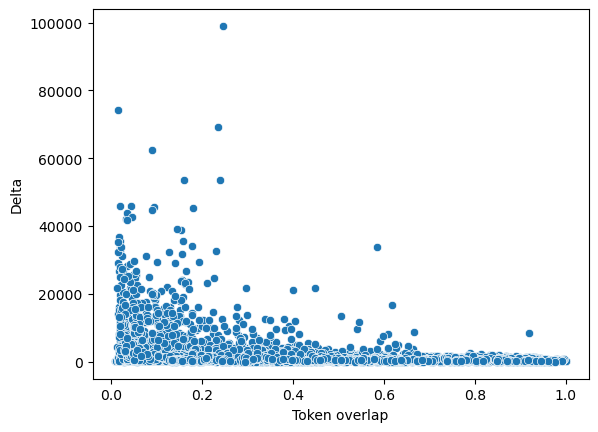

In [31]:
sns.scatterplot(x=corr, y=results, palette="deep")
plt.ylabel("Delta")
plt.xlabel("Token overlap")
plt.show()

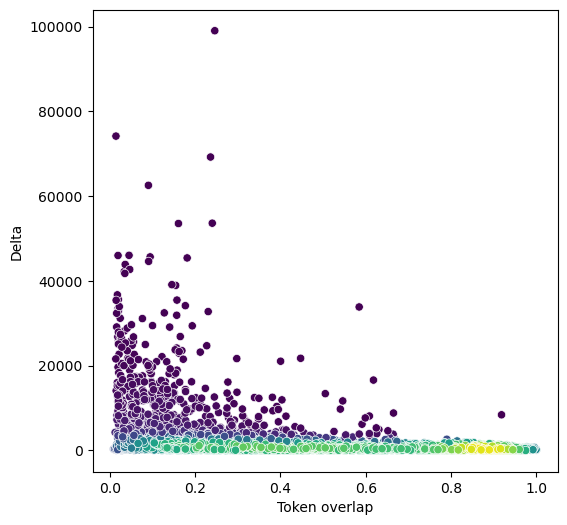

In [32]:
from scipy import stats

values = np.vstack([corr, results])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
g = sns.scatterplot(
    x=corr,
    y=results,
    c=kernel,
    cmap="viridis",
    ax=ax,
)

plt.ylabel("Delta")
plt.xlabel("Token overlap")
plt.show()

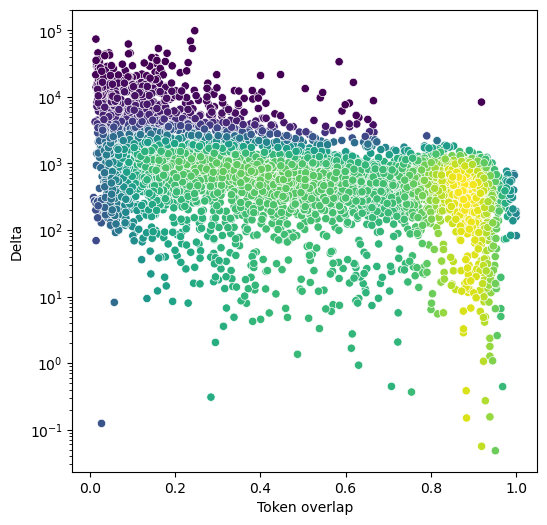

In [33]:
values = np.vstack([corr, results])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
g = sns.scatterplot(
    x=corr,
    y=results,
    c=kernel,
    cmap="viridis",
    ax=ax,
)
g.set_yscale("log")

plt.ylabel("Delta")
plt.xlabel("Token overlap")
plt.show()

In [164]:
import lingtypology

In [165]:
langs["family"] = langs.Language.apply(lambda x: lingtypology.glottolog.get_affiliations([x.split()[0]])[0].split(",")[0])

(get_affiliations) Warning: affiliation for Altai not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Armenian not found
(get_affiliations) Warning: affiliation for Azerbaijani not found
(get_affiliations) Warning: affiliation for Belorussian not found
(get_affiliations) Warning: affiliation for Chichewa not found
(get_affiliations) Warning: affiliation for Dargwa not found
(get_affiliations) Warning: affiliation for Gaelic not found
(get_affiliations) Warning: affiliation for Greenlandic not found
(get_affiliations) Warning: affiliation for Guajajara not found
(get_affiliations) Warning: affiliation for Guaraní not found
(get_affiliations) Warning: affiliation for Guianese not found
(get_affiliations) Warning: affiliation for Hebrew not found
(get_affiliations) Warning: affiliation for Itelmen not found
(get_affiliations) Warning: affiliation for Karakalpak n

In [184]:
relative = []
nonrelative = []
for language, languages in res.to_dict(orient="index").items():
    for low_res, ratio in languages.items():
        family_1 = langs[langs.Language==language]["family"].values[0]
        family_2 = langs[langs.Language==low_res]["family"].values[0]
        if family_1 != "" and family_2 != "" and not np.isnan(ratio):
            if family_1 == family_2:
                relative.append(get_zero_shot(ratio, zero_shot, low_res))
            else:
                nonrelative.append(get_zero_shot(ratio, zero_shot, low_res))

30.0368425788936 33.07
-3.0331574211063987
49.77506198764029 61.72
-11.944938012359707
40.33316695632257 51.67
-11.33683304367743
54.85553234961762 58.27
-3.4144676503823845
108.05280561626893 110.02
-1.9671943837310693
56.673513321116864 88.66
-31.986486678883132
31.81189415911889 33.61
-1.7981058408811101
47.049785293057845 72.91
-25.860214706942152
99.4298861528691 167.74
-68.3101138471309
62.16278138616894 62.38
-0.217218613831065
35.28785274159559 41.74
-6.452147258404409
73.30752838148781 88.66
-15.352471618512183
56.57885938400678 72.91
-16.331140615993213
118.60272065996664 167.74
-49.13727934003337
33.348648767674746 41.74
-8.391351232325256
57.30295697236148 61.72
-4.41704302763852
49.13272400754282 51.67
-2.5372759924571824
100.45264020256444 110.02
-9.567359797435557
63.29748809033379 88.66
-25.362511909666203
47.03183656966387 72.91
-25.87816343033613
114.80540541872828 167.74
-52.934594581271725
30.675251579578696 41.74
-11.064748420421306
51.29945304222511 61.72
-10.4205

In [174]:
ttest_ind(relative, nonrelative)

Ttest_indResult(statistic=4.1775843185501005, pvalue=3.0425566936231333e-05)

In [ ]:
lang = pd.merge(langs, lang, on="Language", how="left")

In [ ]:
def get_iso(lang):
    try:
        return Language.find(lang).to_alpha3()
    except:
        return ""

In [ ]:
lang["iso"] = lang["Language"].apply(get_iso)
#lang.to_csv("tl_lang.csv")

In [ ]:
feat_len = len(list(l2v.get_features("eng", "syntax_wals").values())[0])

In [4]:
def get_feats(lang):
    if lang in l2v.LANGUAGES:
        return list(l2v.get_features(lang, "syntax_wals").values())[0]
    else:
        return ["--"] * feat_len

Sets from feature and inventory databases:

"syntax_wals",
"phonology_wals",
"syntax_sswl",
"syntax_ethnologue",
"phonology_ethnologue",
"inventory_ethnologue",
"inventory_phoible_aa",
"inventory_phoible_gm",
"inventory_phoible_saphon",
"inventory_phoible_spa",
"inventory_phoible_ph",
"inventory_phoible_ra",
"inventory_phoible_upsid",
Averages of sets:

"syntax_average",
"phonology_average",
"inventory_average",
KNN predictions of feature values:

"syntax_knn",
"phonology_knn",
"inventory_knn",
Membership in language families and subfamilies:

"fam",
Distance from fixed points on Earth's surface

"geo",
Learned vector used for typological predictions in Malaviya et al.

"learned",
One-hot identity vector:

"id",

In [195]:
lang["feat"] = lang["iso"].apply(get_feats)

In [217]:
lr_lang = list(res.iloc[0].index)
hr_lang = list(res.index)
X_pairs = {}

In [199]:
def compare_lists(l1, l2):
    return [l1[i] == l2[i] if l1[i] != "--" and l2[i] !="--" else False for i in range(len(l1))]

In [200]:
for high_res in tqdm(hr_lang):
    if high_res in lang["Language"].to_list():
        l1 = lang[lang["Language"]==high_res]["feat"].to_list()[0]
        for low_res in lr_lang:
            l2 = lang[lang["Language"]==low_res]["feat"].to_list()
            if l2:
                l2 = l2[0]
            value = res[res.index == high_res][low_res].values[0]
            if not np.isnan(value):
                X_pairs[(low_res, high_res)] = (compare_lists(l1, l2), get_zero_shot(value, zero_shot, low_res)) 
    else:
        print(high_res)

  0%|          | 0/158 [00:00<?, ?it/s]

In [201]:
lang

,Language,Unnamed: 0,HR,iso,syntax,feat
0,Abaza,0.0,1,abq,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
1,Adyghe (Shapsugh),2.0,1,ady,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,Afrikaans,3.0,1,afr,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
3,Akan,4.0,0,aka,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
4,Albanian,5.0,1,sqi,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
...,...,...,...,...,...,...
210,Yiddish (Lithuanian),277.0,1,yid,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
211,Yukaghir (Kolyma),279.0,0,,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
212,Yukaghir (Tundra),280.0,1,,"['--', '--', '--', '--', '--', '--', '--', '--...","[--, --, --, --, --, --, --, --, --, --, --, -..."
213,Yup'ik (Central),281.0,1,esu,"['--', '--', '--', '--', '--', '--', 1.0, 1.0,...","[--, --, --, --, --, --, 1.0, 1.0, 1.0, 1.0, -..."


In [202]:
X, y = zip(*list(X_pairs.values()))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
model = LogisticRegression()

In [204]:
model.fit(X, y)

LogisticRegression()

In [205]:
len(X_pairs)

4714

In [206]:
names = l2v.get_features("eng", "syntax_wals", header=True)["CODE"]

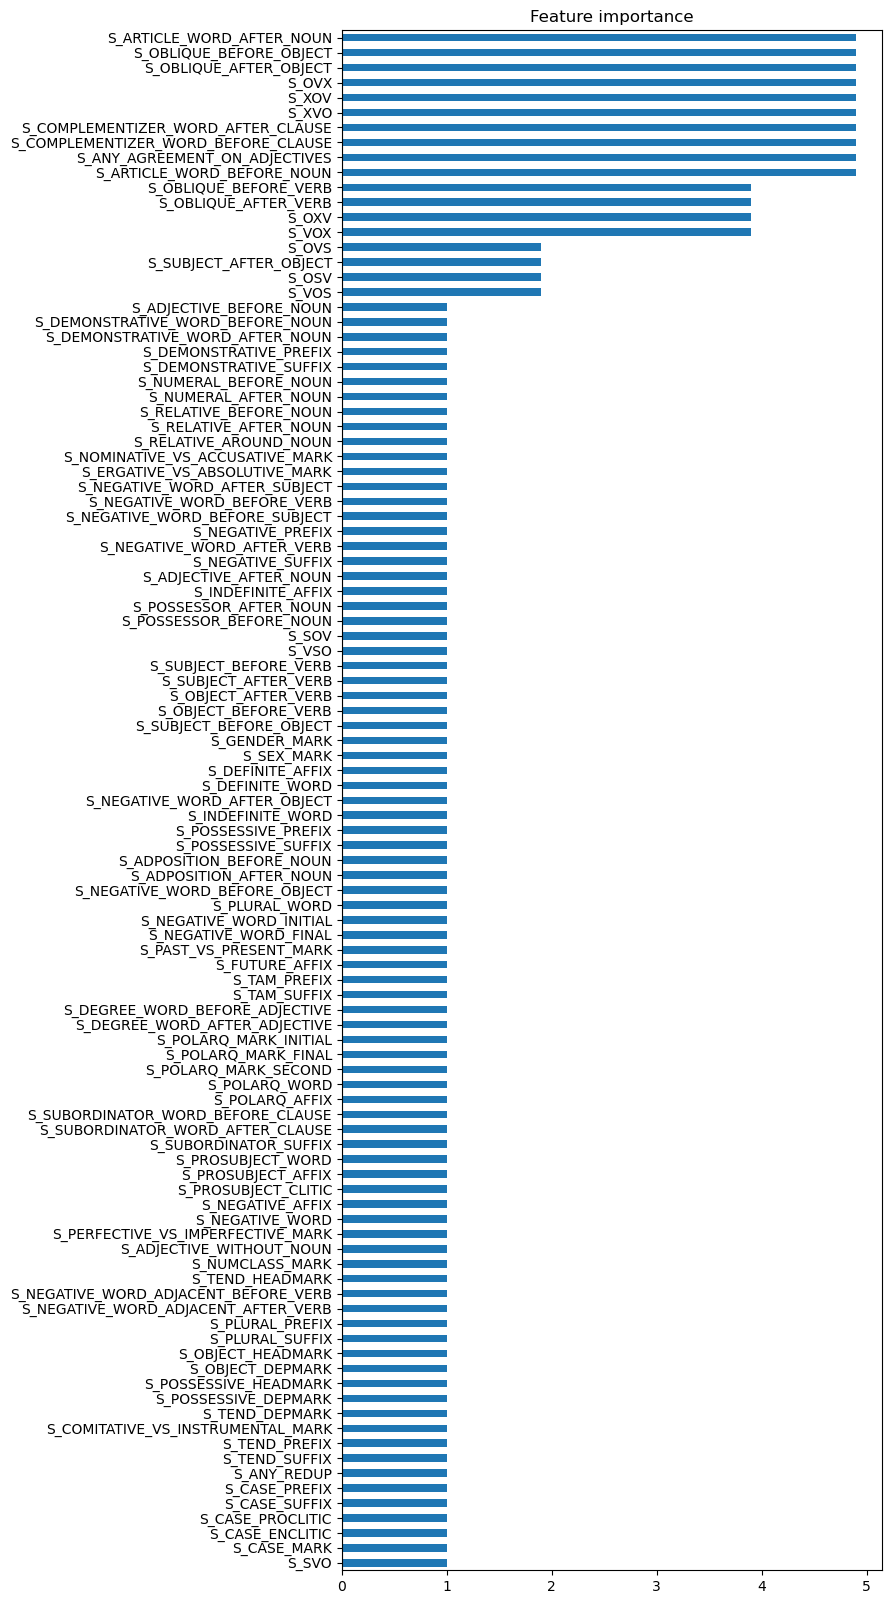

In [207]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    model.coef_[0], columns=["Coefficients"], index=names
)

coefs["Coefficients"] = coefs.Coefficients.fillna(0.0)
norm = coefs.Coefficients.value_counts(normalize=True).mul(100).round(1).to_dict()
coefs["percentage"] = coefs.Coefficients.apply(lambda x: norm[x])
coefs = coefs.sort_values("percentage")
coefs["percentage"].plot(kind="barh", figsize=(9, 20))
plt.title("Feature importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [208]:
lang["num_nan"] = lang["feat"].apply(lambda x: x.count("--"))

In [210]:
y_pred = model.predict(X_test)

In [211]:
r2_score(y_test, y_pred)

-0.009417808219178259

In [212]:
accuracy_score(y_test, y_pred)

0.9906700593723494